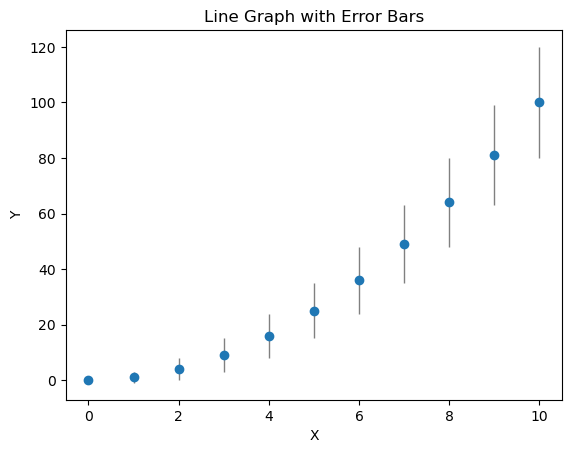

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data
x = np.linspace(0, 10, 11)
y = x ** 2
y_err = 2 * x

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the data with error bars
ax.errorbar(x, y, yerr=y_err, fmt='o', ecolor='gray', elinewidth=1)

# Add axis labels and a title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Line Graph with Error Bars')

# Show the plot
plt.show()

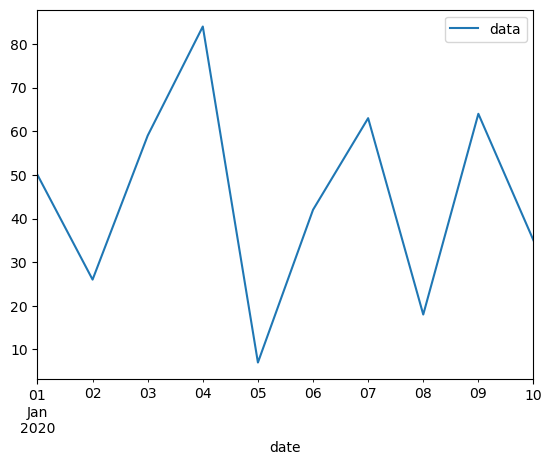

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# create sample data
date_rng = pd.date_range(start='1/1/2020', end='1/10/2020', freq='D')
data = {'date': date_rng, 'data': np.random.randint(0,100,size=(len(date_rng)))}
df = pd.DataFrame(data)

# plot
df.plot(x ='date', y='data', kind = 'line')
plt.show()


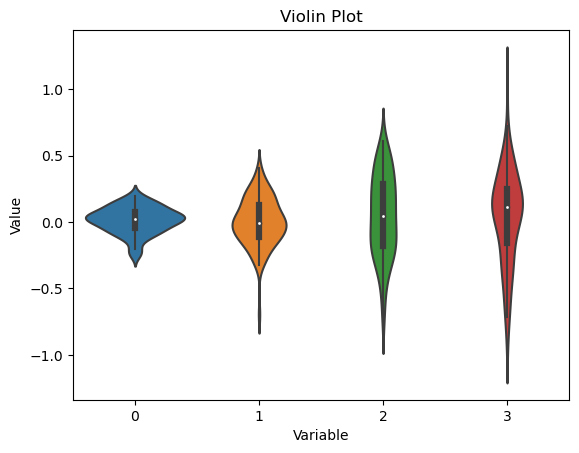

In [3]:
import numpy as np
import seaborn as sns

# Generate some example data
data = [np.random.normal(0, i*0.1, 100) for i in range(1, 5)]

# Create the violin plot
sns.violinplot(data=data)

# Add axis labels and a title
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Violin Plot')

# Show the plot
plt.show()

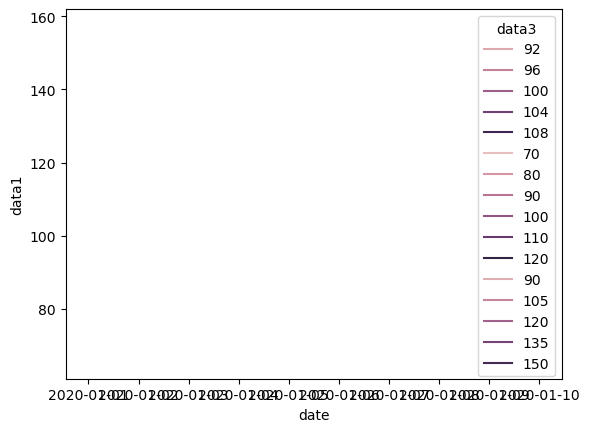

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

# create sample data
date_rng = pd.date_range(start='1/1/2020', end='1/10/2020', freq='D')
data = {'date': date_rng, 'data1': np.random.normal(100,10,size=(len(date_rng))),
        'data2': np.random.normal(90,20,size=(len(date_rng))),
        'data3': np.random.normal(110,30,size=(len(date_rng)))}
df = pd.DataFrame(data)

# plot
sns.lineplot(x ='date', y='data1',data=df, hue='data1')
sns.lineplot(x ='date', y='data2',data=df, hue='data2')
sns.lineplot(x ='date', y='data3',data=df, hue='data3')
plt.show()


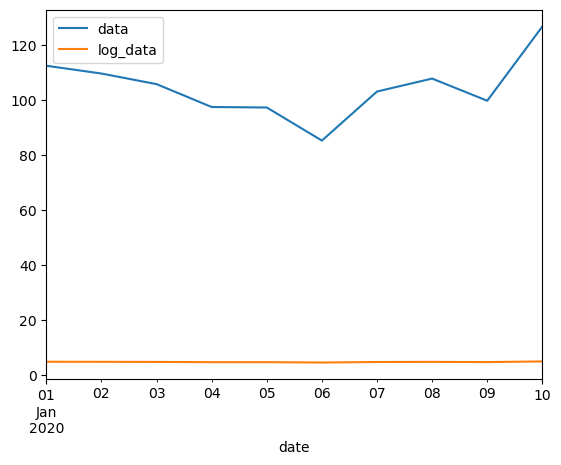

In [11]:
import pandas as pd
import numpy as np


#create sample data
date_rng = pd.date_range(start='1/1/2020', end='1/10/2020', freq='D')
data = {'date': date_rng, 'data': np.random.normal(100,10,size=(len(date_rng)))}
df = pd.DataFrame(data)

#apply log transformation
df['log_data'] = np.log(df['data'])

# plot
df.plot(x ='date', y=['data','log_data'], kind = 'line')

plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Load the built-in AirPassenger dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',
                 header=0,
                 index_col=0)


# Perform the DFT
result = adfuller(df['Passengers'])

# Print the test statistics
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


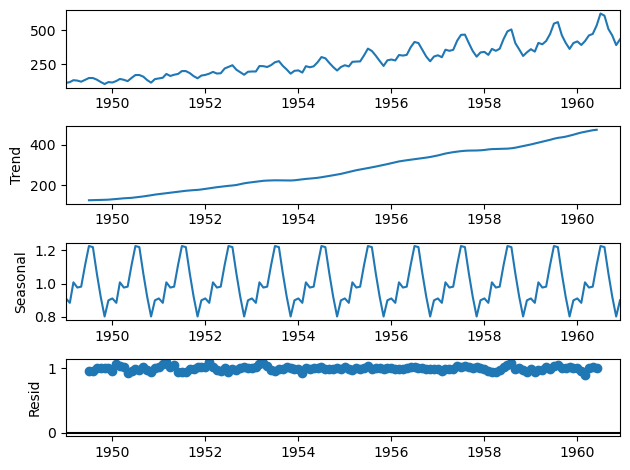

MissingDataError: exog contains inf or nans

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import matplotlib.pyplot as plt

# Load the built-in AirPassenger dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',
                 header=0,
                 index_col=0)
df.index = pd.to_datetime(df.index)

# Decompose the time series
result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()
residuals = result.resid


# Perform the ADF test on the residuals
result_adf = adfuller(residuals)

# Print the test statistics
print('ADF Statistic: %f' % result_adf[0])
print('p-value: %f' % result_adf[1])
print('Critical Values:')
for key, value in result_adf[4].items():
    print('\t%s: %.3f' % (key, value))